## AT&T

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
from aggregators import (
    race, 
    income, 
    redlining, 
    plot_race, 
    speed_breakdown, 
    unserved, 
    bucket_and_bin
)

In [3]:
# inputs
fn_att = '../data/output/speed_price_att.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_att.csv'
fn_fig3a = '../data/output/figs/fig3_income.csv'
fn_fig3b = '../data/output/figs/fig3_race.csv'
fn_fig3c = '../data/output/figs/fig3_redline.csv'

In [4]:
att = pd.read_csv(fn_att, compression='gzip')
len(att)

429876

In [5]:
att.major_city.nunique()

20

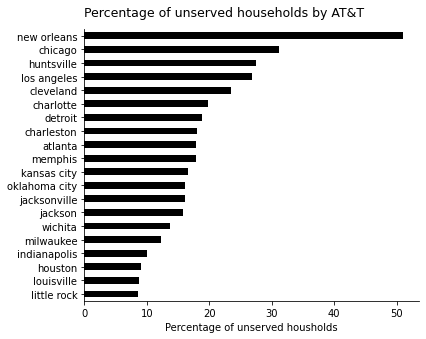

In [6]:
unserved(att, isp='AT&T')

In [7]:
att = att[att.speed_down != 0]
len(att)

343591

In [8]:
att = bucket_and_bin(att)

In [9]:
att[att.major_city == 'huntsville']

,address_full,incorporated_place,major_city,state,lat,lon,availability_status,block_group,collection_datetime,provider,...,ppl_per_sq_mile,n_providers,income_dollars_below_median,internet_perc_broadband,median_household_income,income_level,speed_down_bins,race_quantile,race_bins,is_slow
1,"6413 Robinhood Ln NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.718164,-86.661722,EXISTINGSERVICES,10890014021,1650315620,AT&T,...,1814.993931,4.0,12070.0,0.892045,44688.0,Moderate,Blazing (>200),more white,Majority White,0
2,"6316 Davies Ave NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.716361,-86.663259,GREEN,10890014021,1650315619,AT&T,...,1814.993931,4.0,12070.0,0.892045,44688.0,Moderate,Blazing (>200),more white,Majority White,0
5,"6409 Sheri Dr NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.715729,-86.665242,GREEN,10890014021,1650315636,AT&T,...,1814.993931,4.0,12070.0,0.892045,44688.0,Moderate,Blazing (>200),more white,Majority White,0
7,"6313 Davies Ave NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.715851,-86.662935,GREEN,10890014021,1650315628,AT&T,...,1814.993931,4.0,12070.0,0.892045,44688.0,Moderate,Blazing (>200),more white,Majority White,0
9,"300 Blocker St NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.713595,-86.663736,EXISTINGSERVICES,10890014021,1650315644,AT&T,...,1814.993931,4.0,12070.0,0.892045,44688.0,Moderate,Blazing (>200),more white,Majority White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,"8328 Anslee Way NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.789324,-86.678465,GREEN,10890106211,1650359717,AT&T,...,242.114305,5.0,-65067.0,0.946223,121825.0,Upper Income,Blazing (>200),more white,Majority White,0
6227,"8340 Anslee Way NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.790420,-86.679028,EXISTINGSERVICES,10890106211,1650359623,AT&T,...,242.114305,5.0,-65067.0,0.946223,121825.0,Upper Income,Blazing (>200),more white,Majority White,0
6228,"7026 Camrose Ln NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.793969,-86.685690,EXISTINGSERVICES,10890106211,1650359726,AT&T,...,242.114305,5.0,-65067.0,0.946223,121825.0,Upper Income,Blazing (>200),more white,Majority White,0
6229,"7572 Addison Dr NW, Huntsville AL 35806",Huntsville city,huntsville,AL,34.792164,-86.675890,EXISTINGSERVICES,10890106211,1650359624,AT&T,...,242.114305,5.0,-65067.0,0.946223,121825.0,Upper Income,Blazing (>200),more white,Majority White,0


In [10]:
# who gets options?
att[(att['speed_down'] != att['fastest_speed_down']) &
    (~att['fastest_speed_down'].isnull())]['speed_down'].value_counts(normalize=True)

300.0    0.999987
100.0    0.000007
25.0     0.000007
Name: speed_down, dtype: float64

In [11]:
# what is the price per Mbps?
55 / att.speed_down.describe()

count     0.000160
mean      0.353065
std       0.424330
min      71.614583
25%       2.200000
50%       0.550000
75%       0.183333
max       0.183333
Name: speed_down, dtype: float64

In [12]:
# make the above for each city:
city2speeds = pd.DataFrame()
for (city, state), _df in att.groupby(['major_city', 'state']):
    row = _df.speed_down_bins.value_counts(normalize=True, sort=False).to_frame().T
    row.reset_index(drop=True, inplace=True)
    row['major_city'] = city.title()
    row['state'] = state
    city2speeds = city2speeds.append(row)
city2speeds.to_csv(fn_speed, index=False)

In [13]:
variety = att.groupby(['major_city', 'state']).speed_down_bins.value_counts(normalize=True)
homogenous_cities = variety[variety >= .95].index.get_level_values(0)
len(homogenous_cities)

0

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


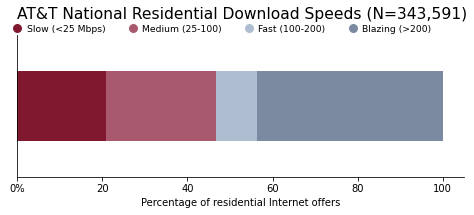

In [14]:
speed_breakdown(att)

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:426: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


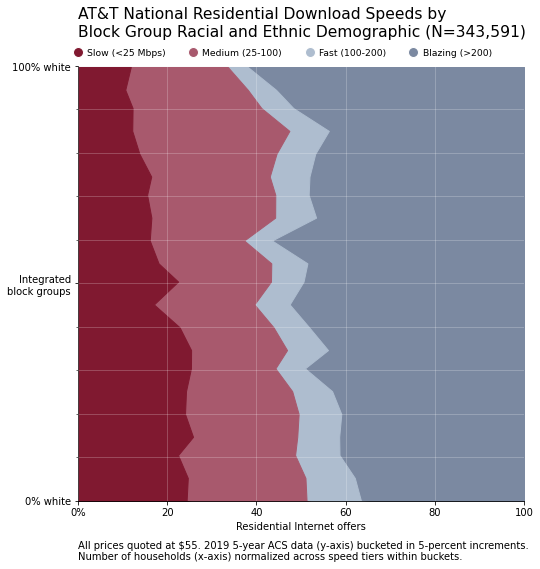

In [15]:
plot_race(att)

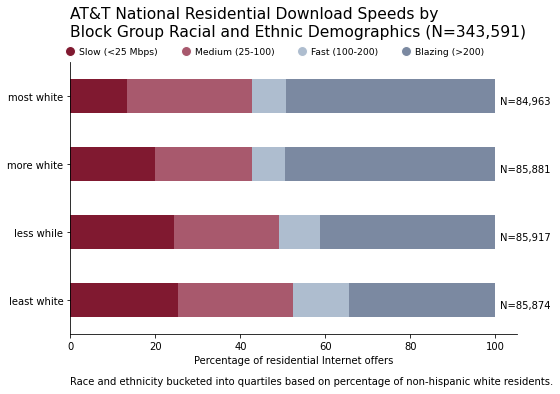

In [16]:
race(att)

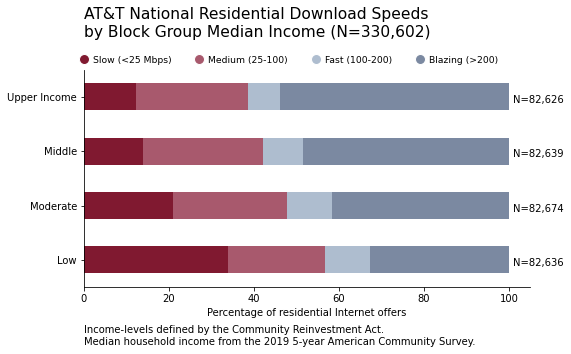

In [17]:
income(att)

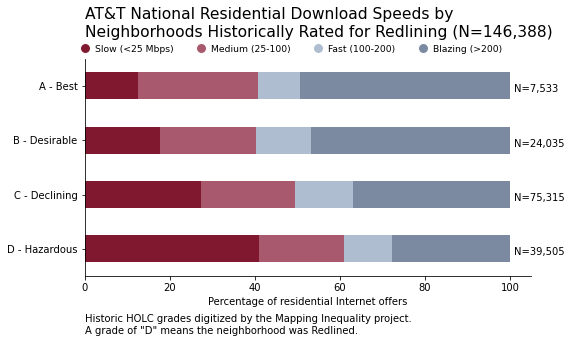

In [18]:
redlining(att)

## City by City

atlanta


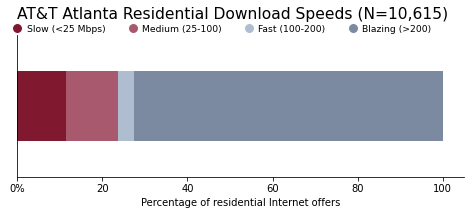

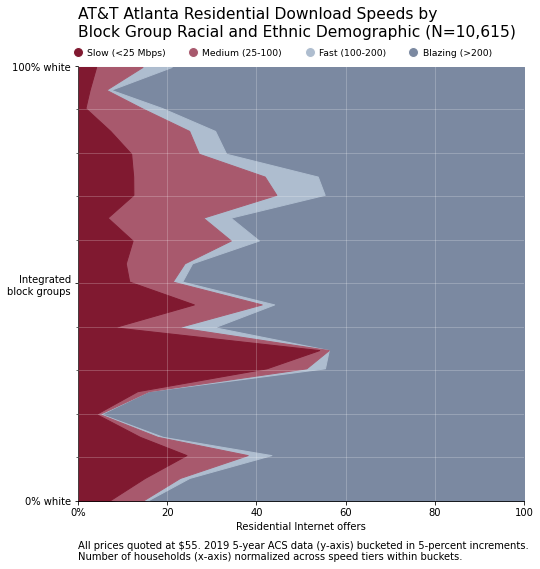

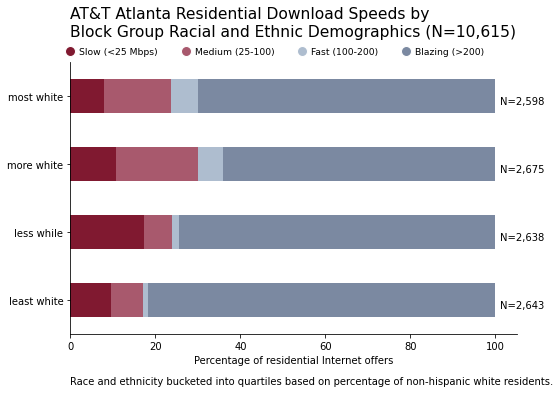

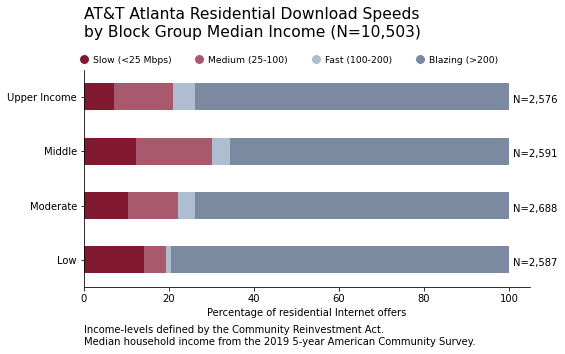

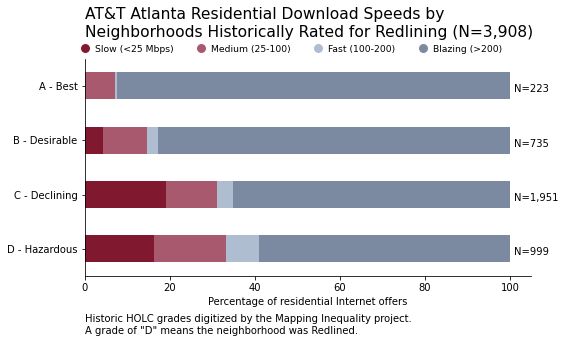

*******************************************************************************
charleston


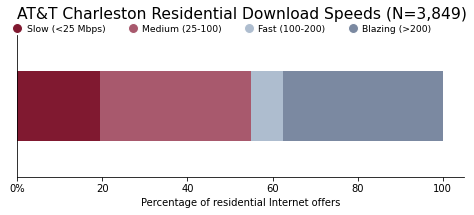

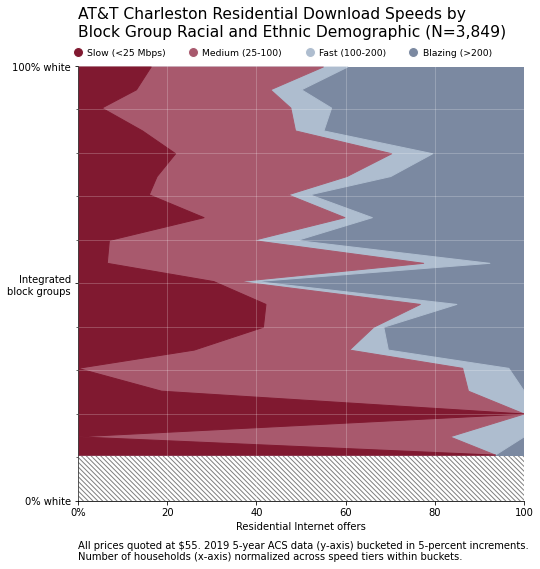

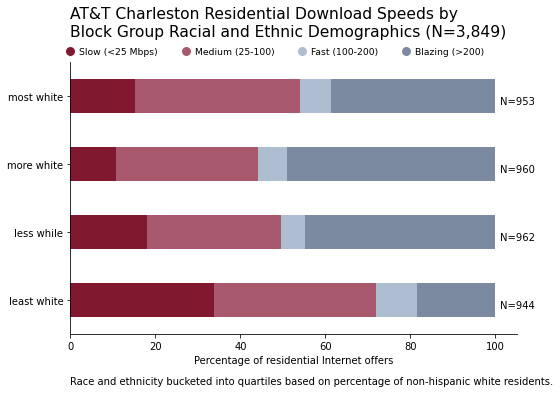

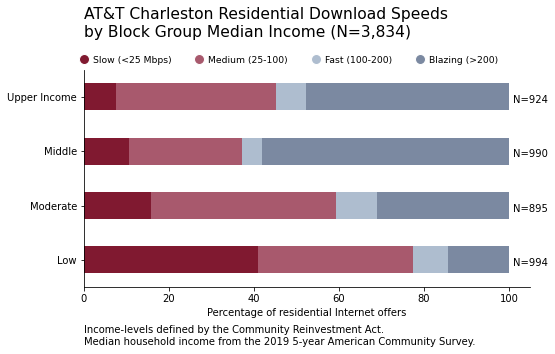

*******************************************************************************
charlotte


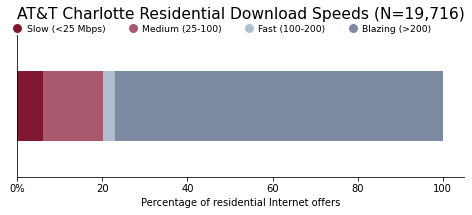

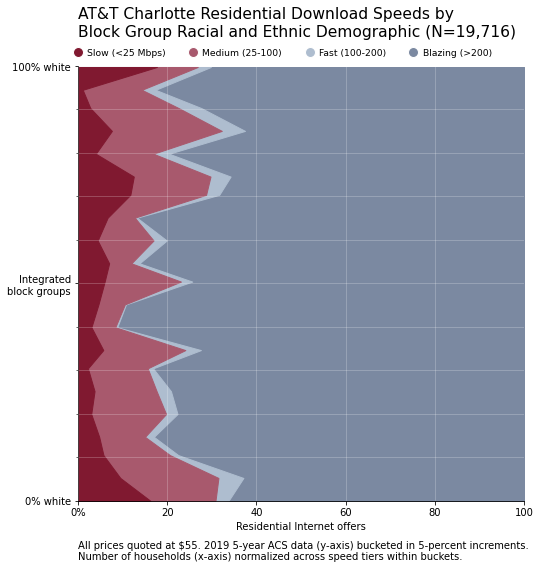

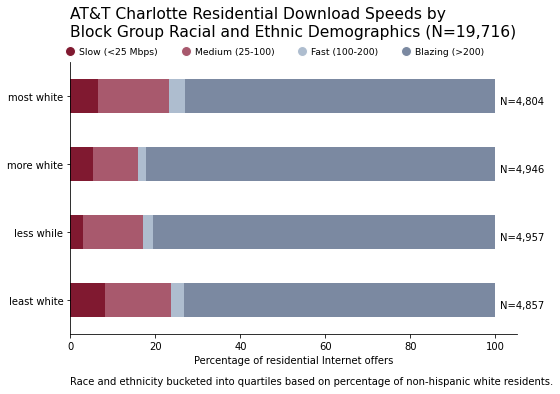

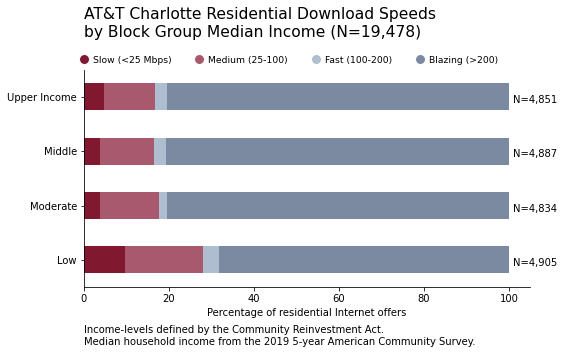

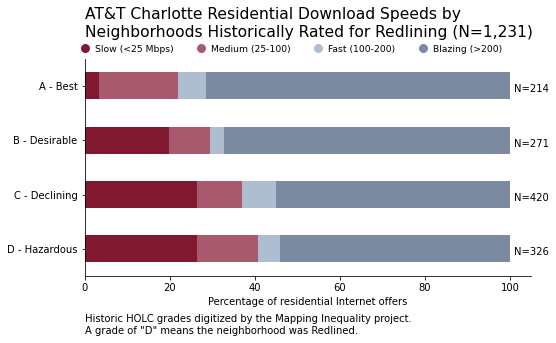

*******************************************************************************
chicago


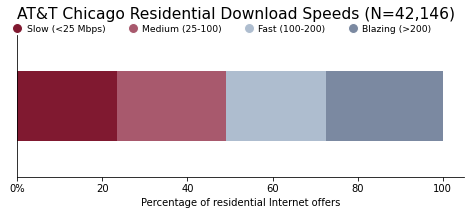

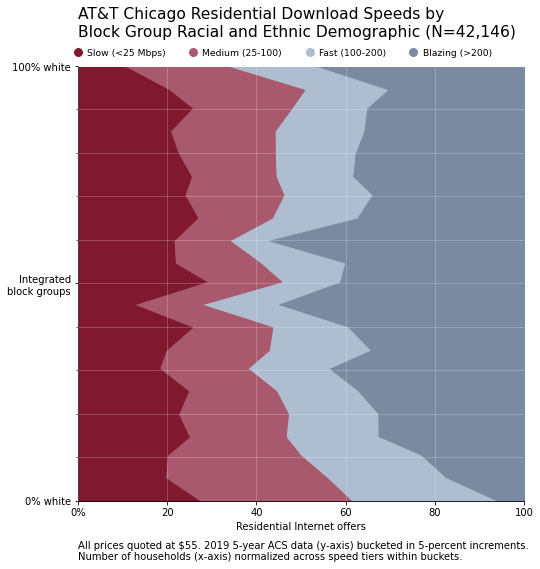

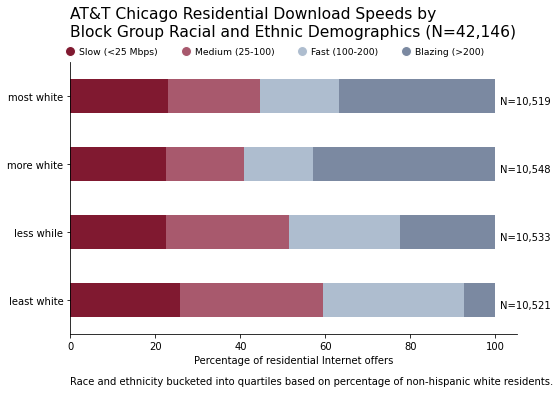

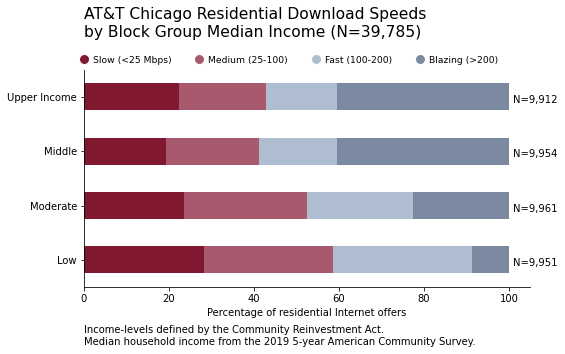

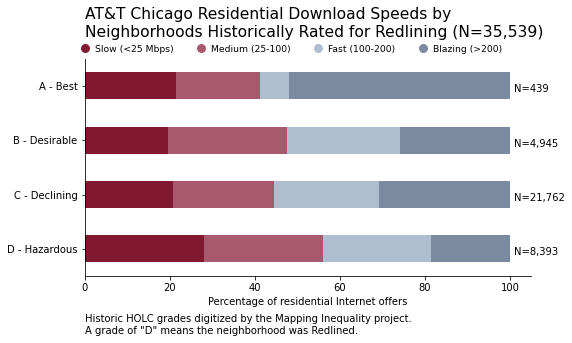

*******************************************************************************
cleveland


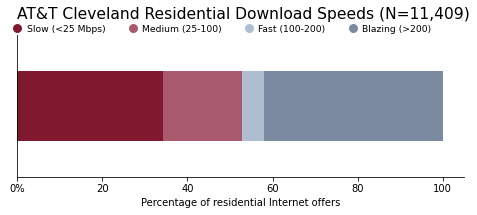

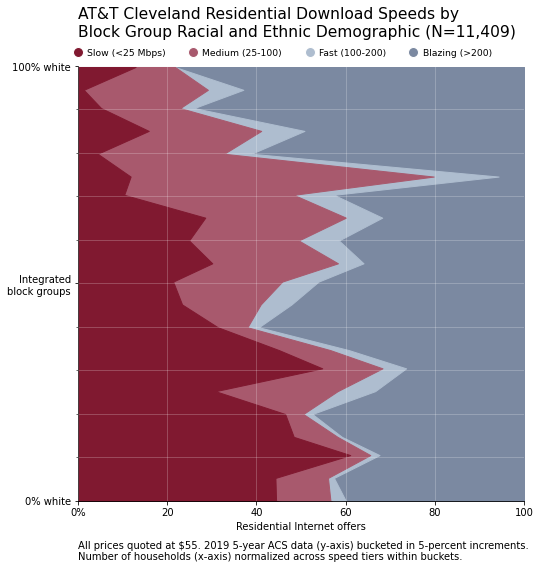

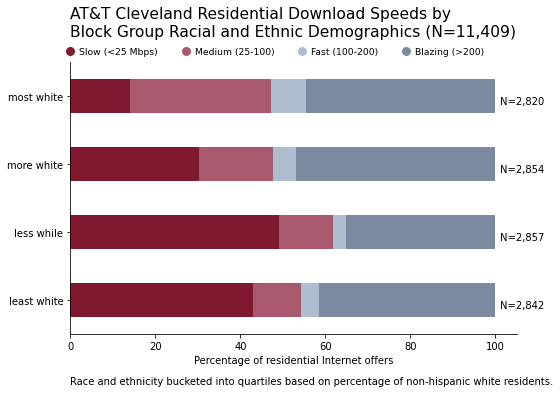

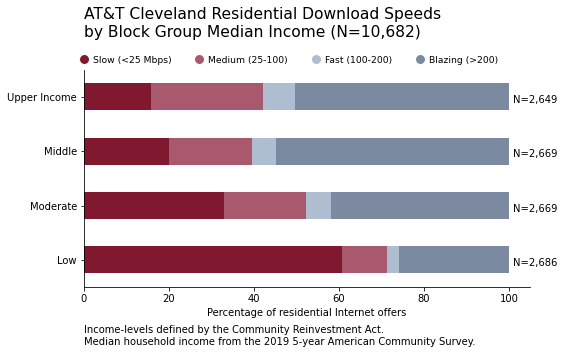

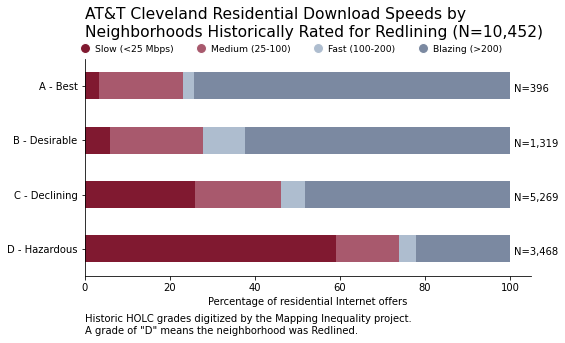

*******************************************************************************
detroit


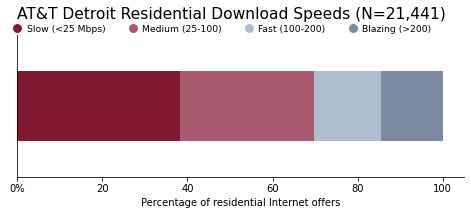

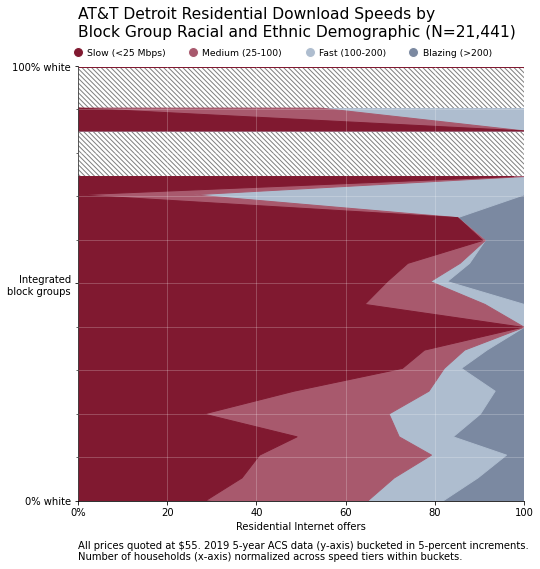

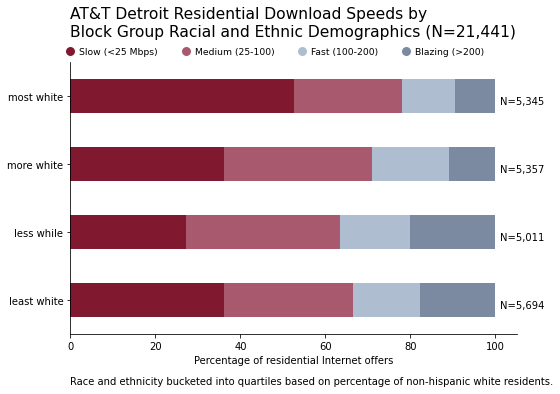

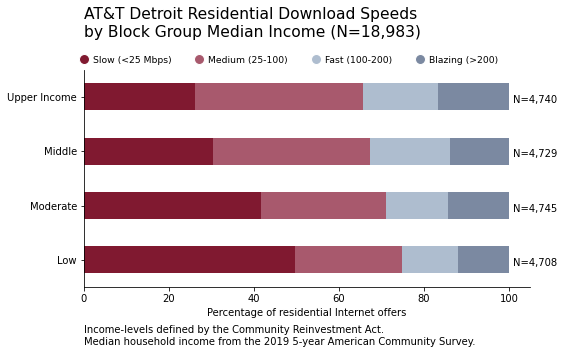

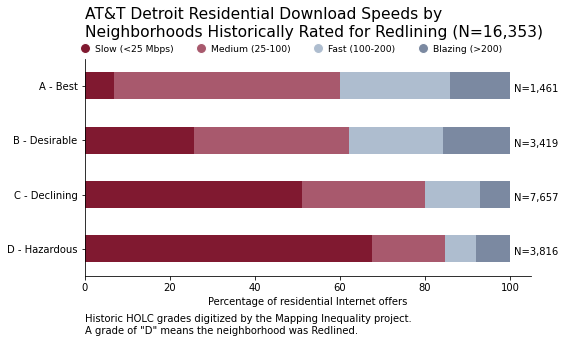

*******************************************************************************
houston


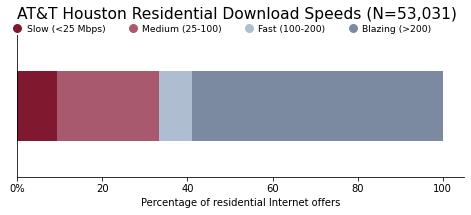

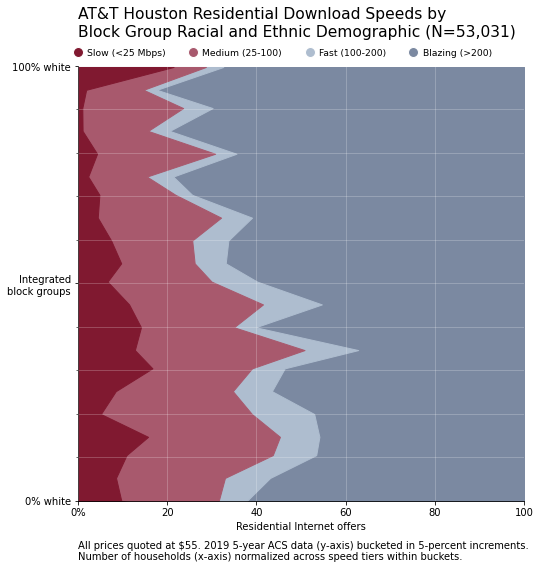

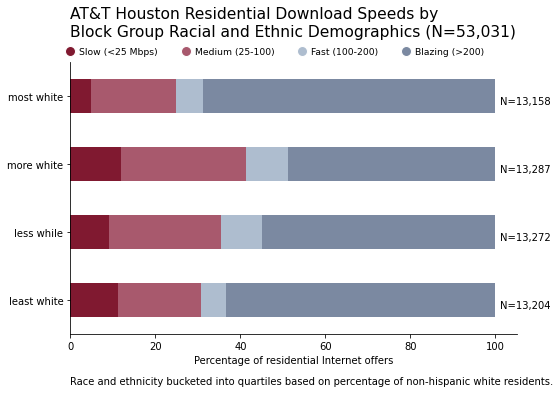

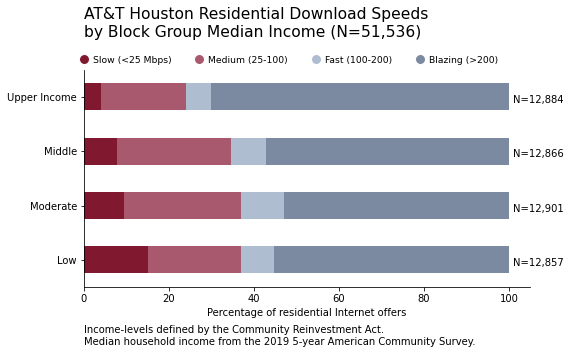

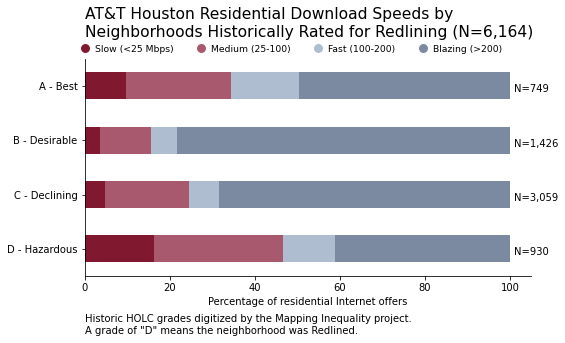

*******************************************************************************
huntsville


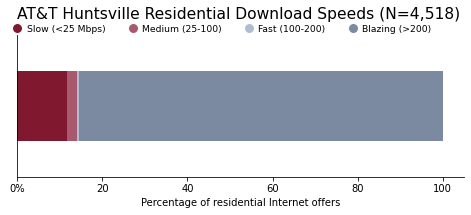

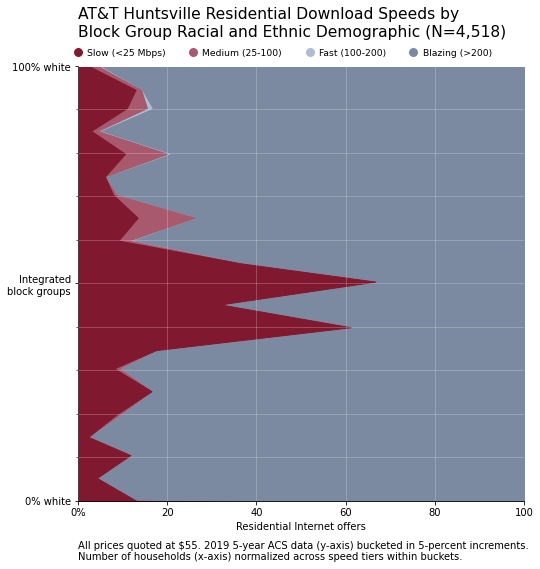

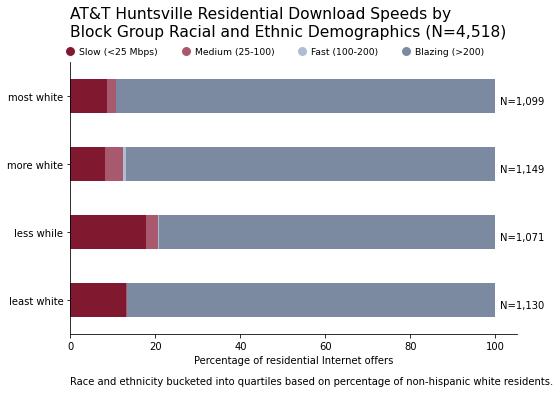

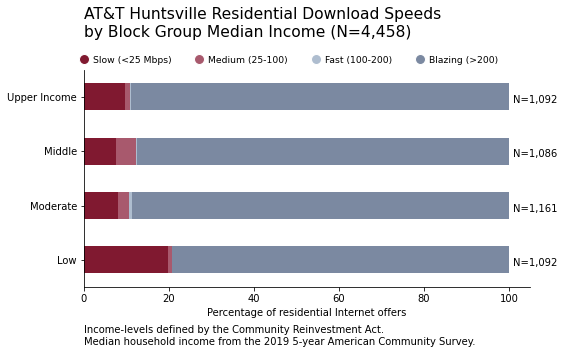

*******************************************************************************
indianapolis


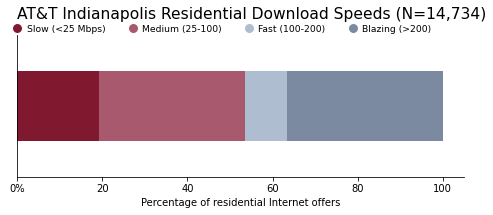

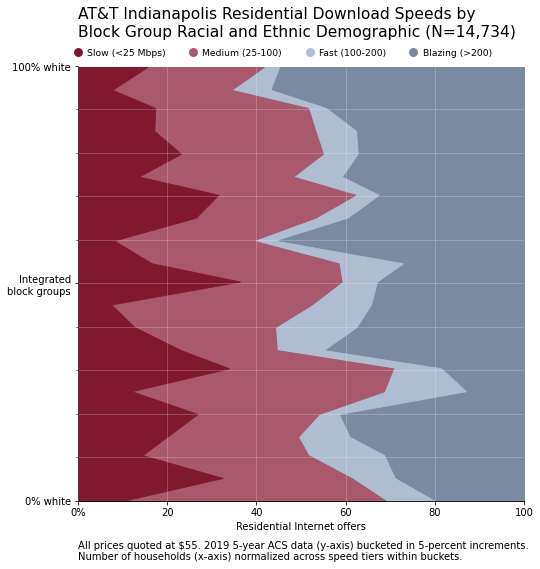

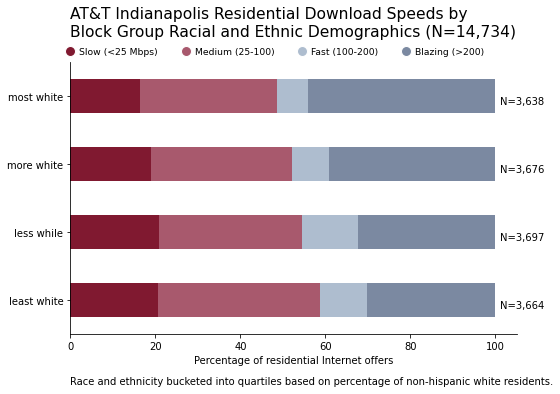

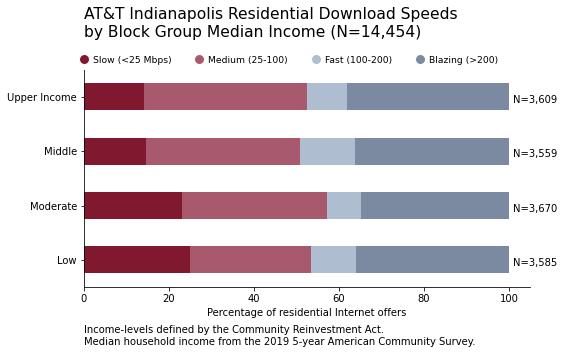

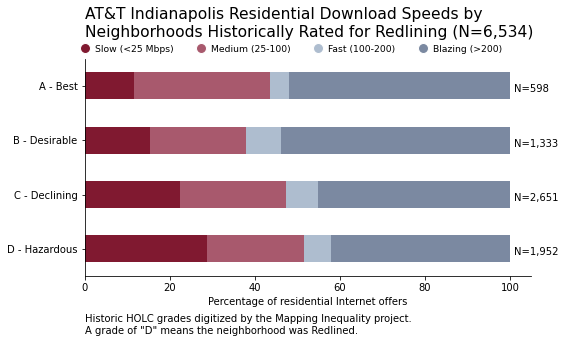

*******************************************************************************
jackson


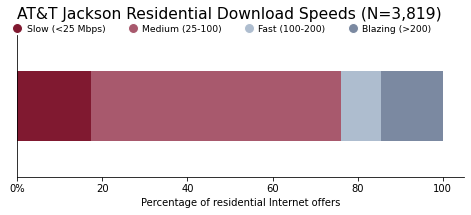

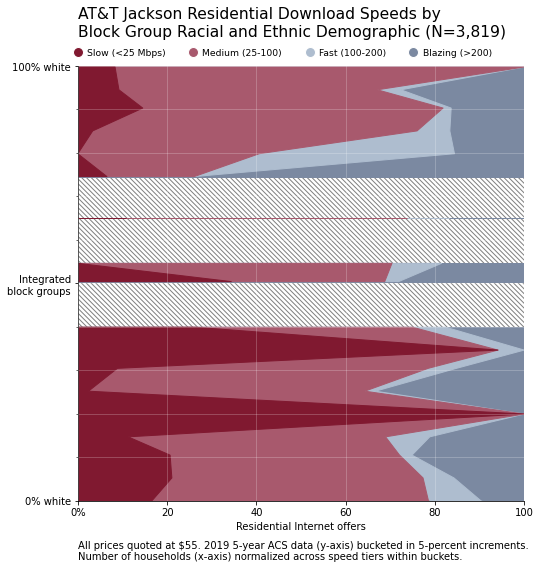

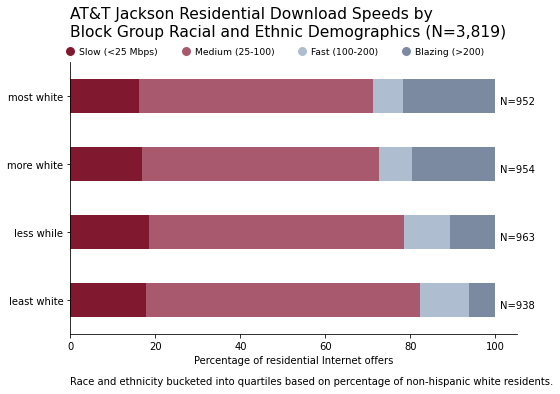

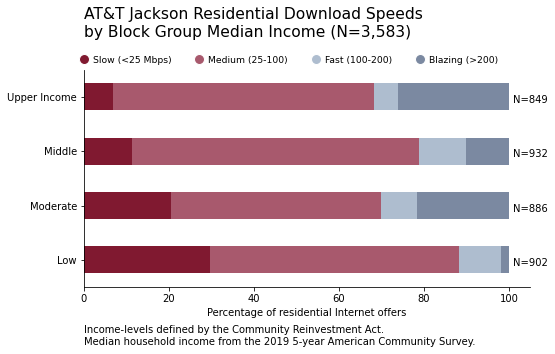

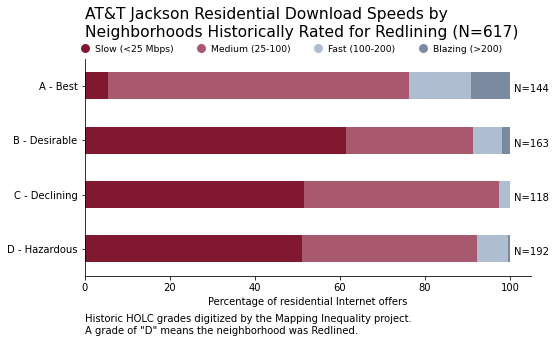

*******************************************************************************
jacksonville


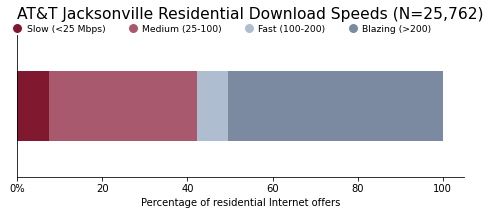

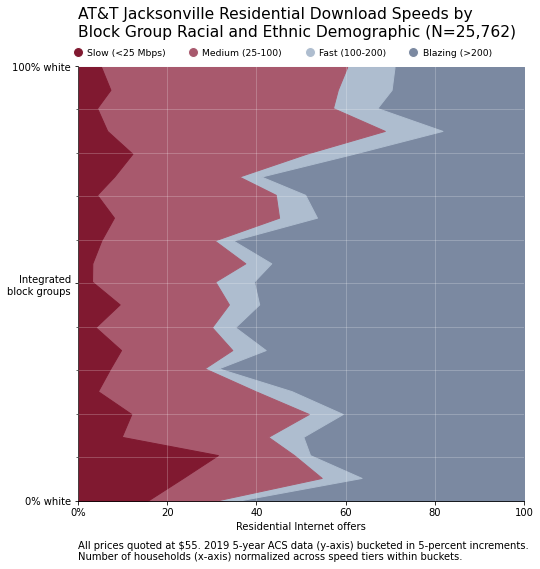

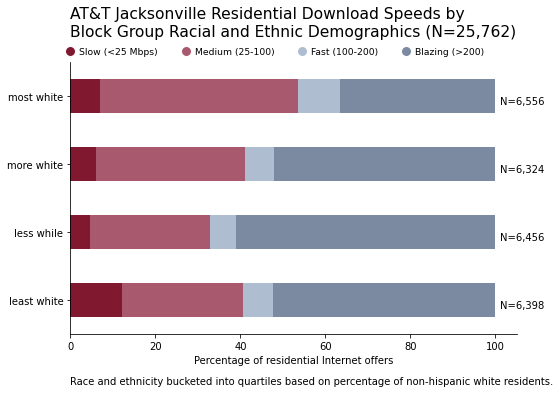

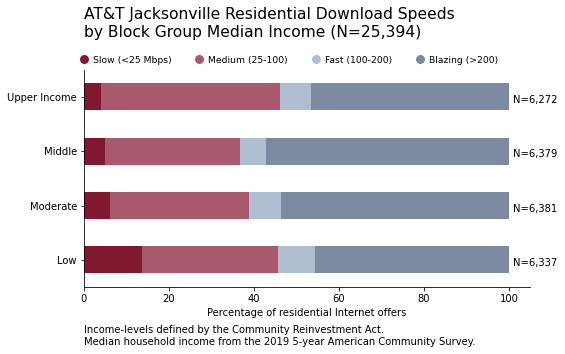

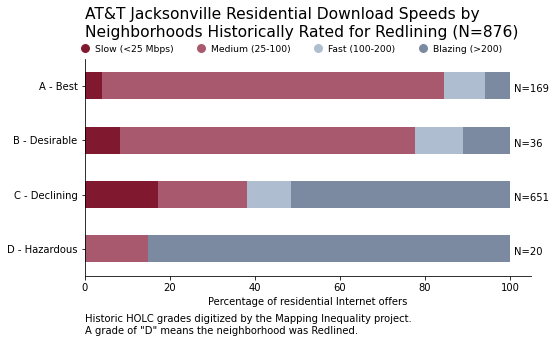

*******************************************************************************
kansas city


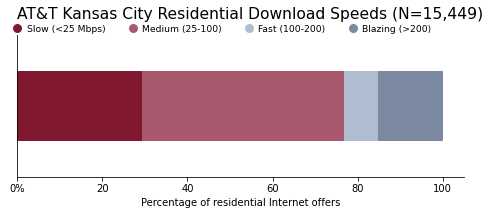

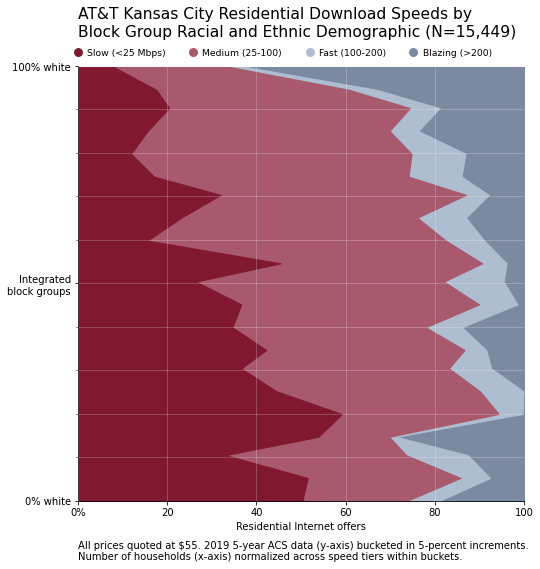

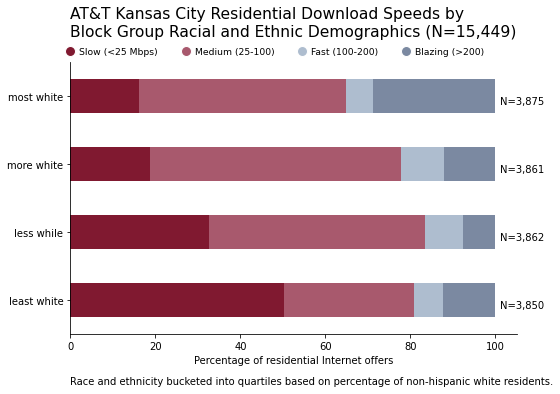

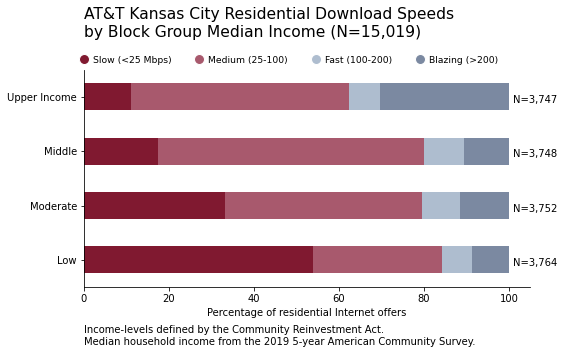

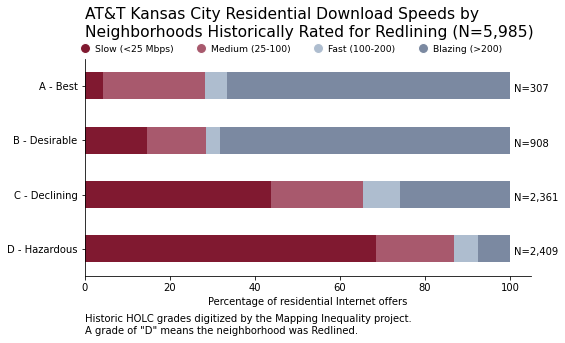

*******************************************************************************
little rock


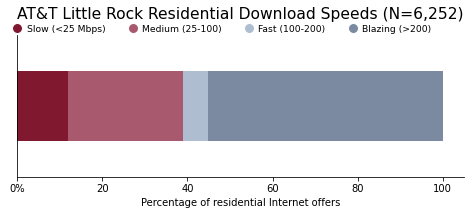

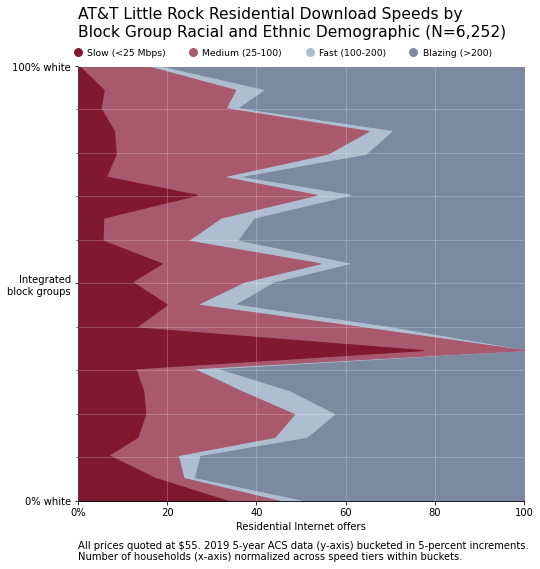

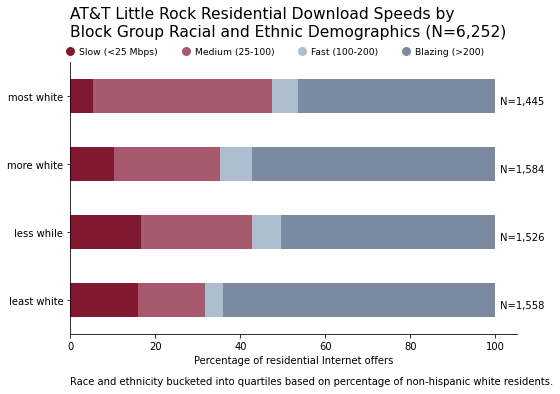

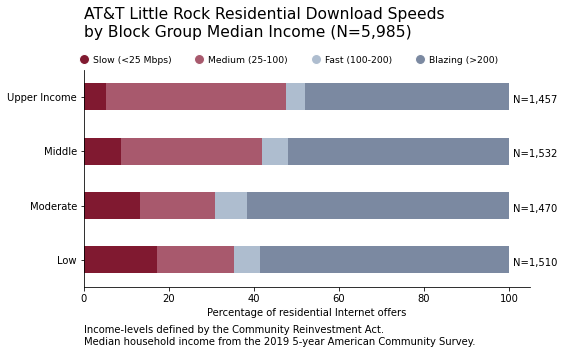

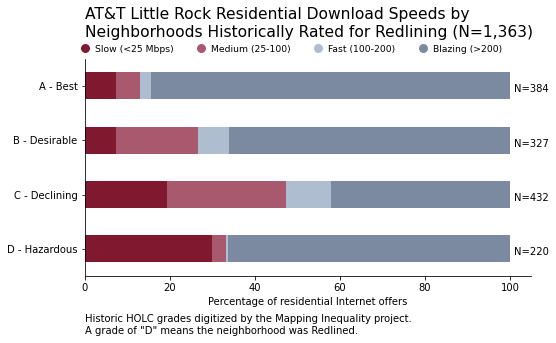

*******************************************************************************
los angeles


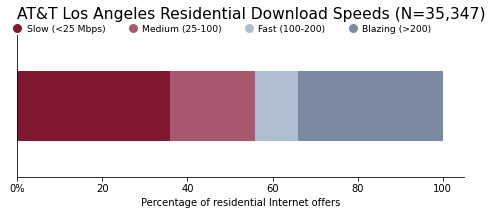

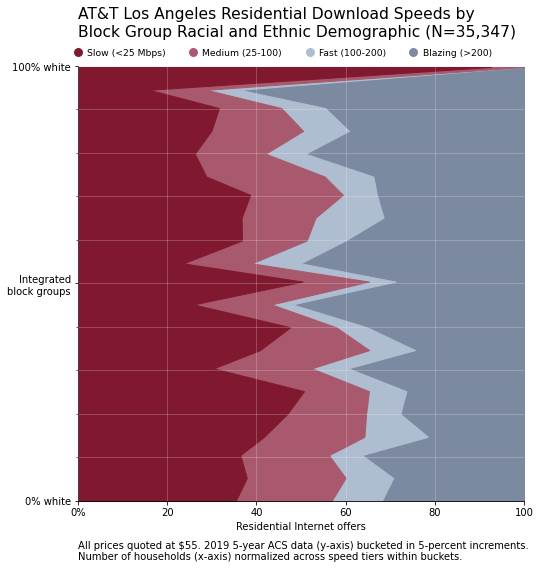

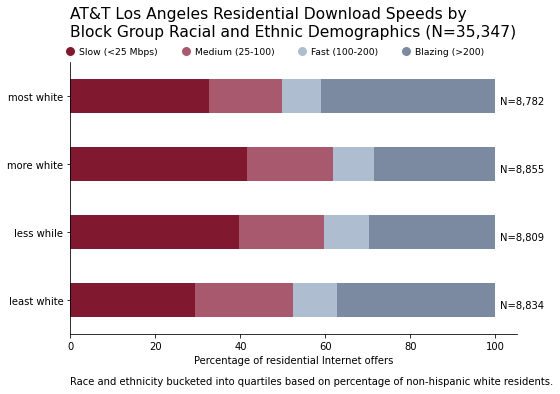

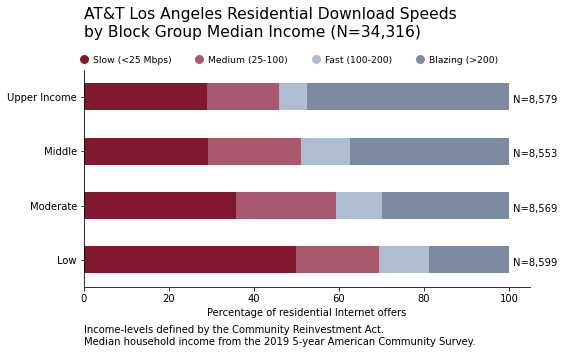

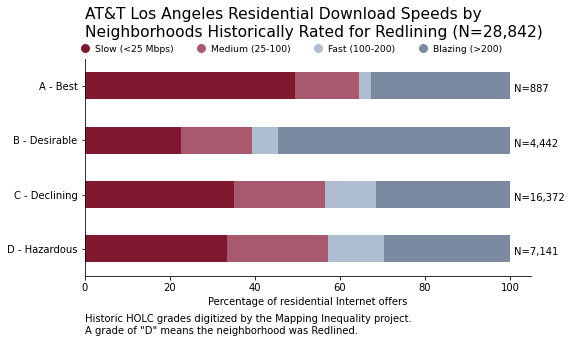

*******************************************************************************
louisville


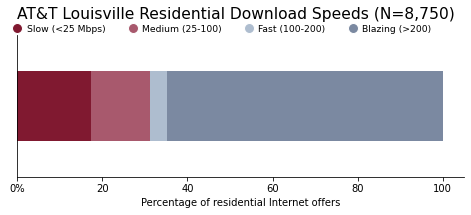

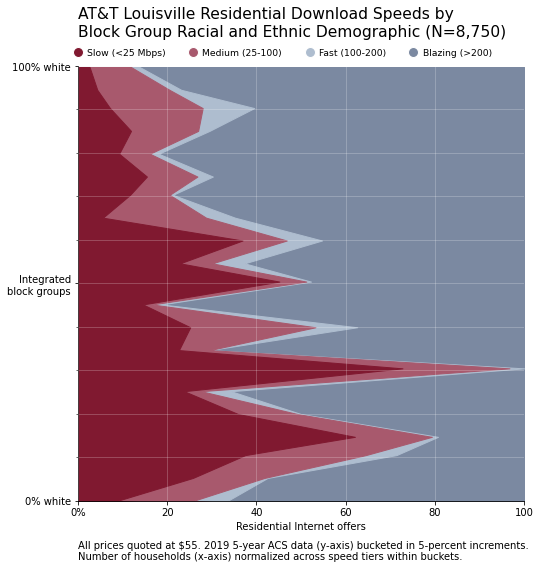

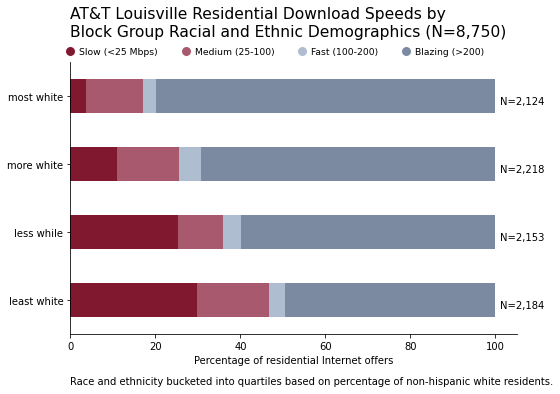

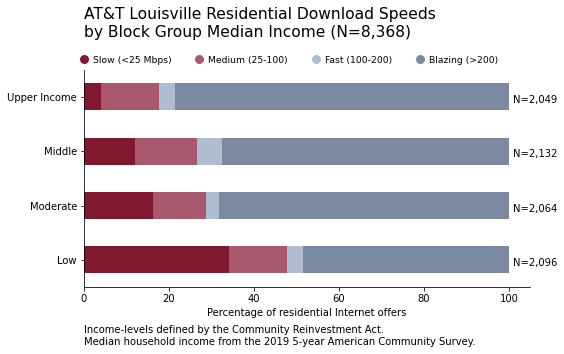

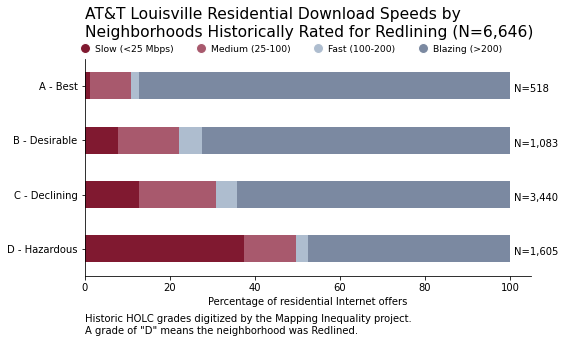

*******************************************************************************
memphis


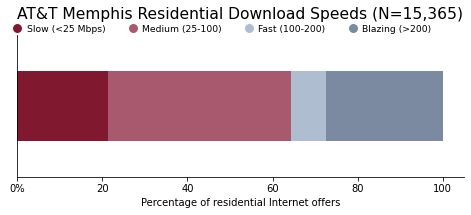

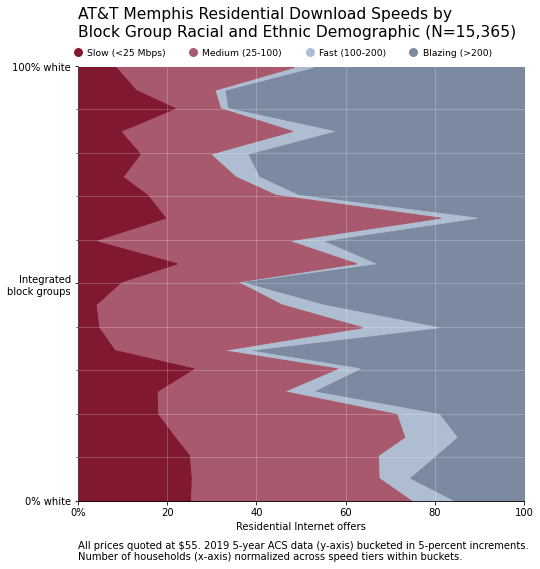

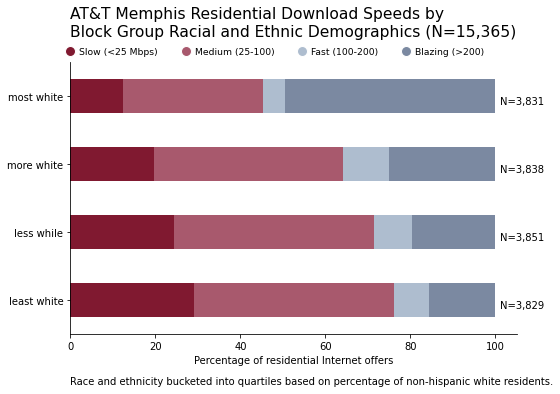

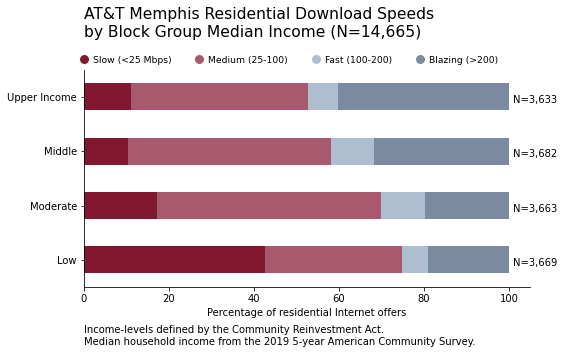

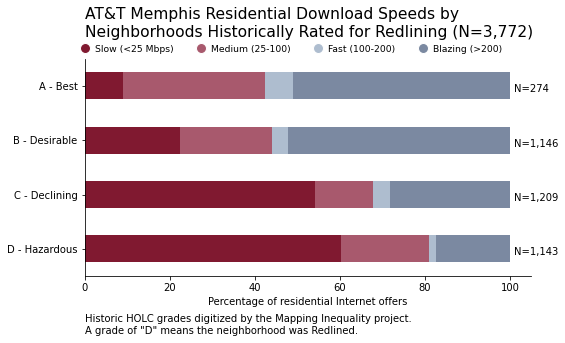

*******************************************************************************
milwaukee


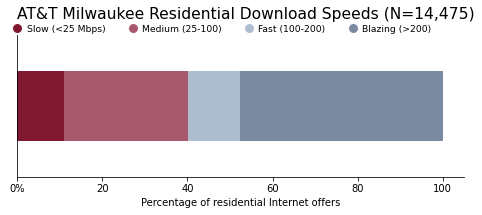

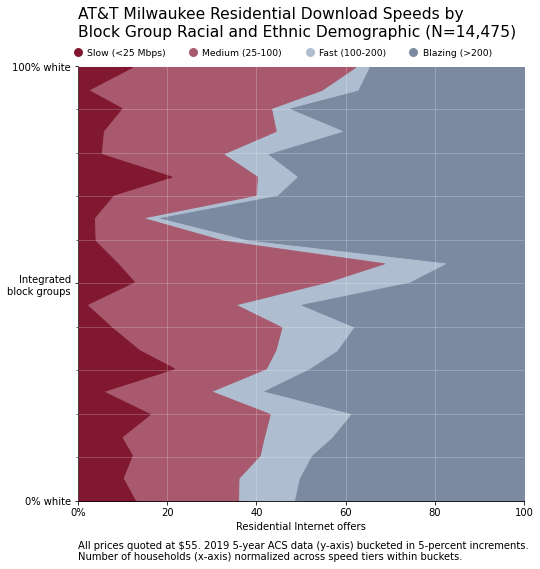

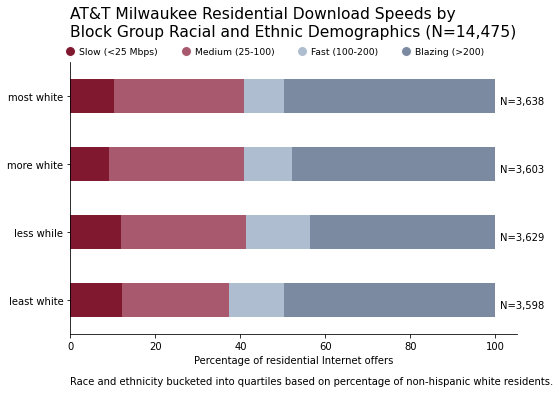

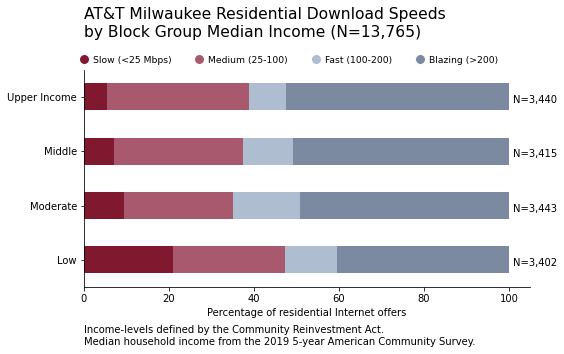

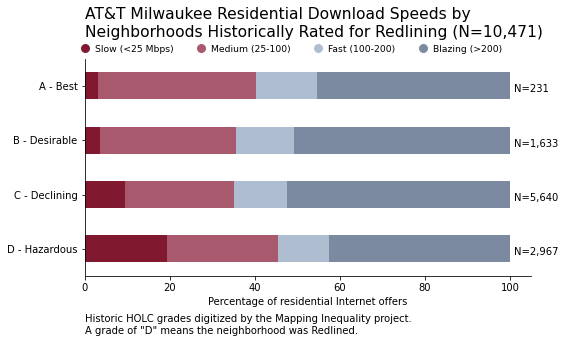

*******************************************************************************
new orleans


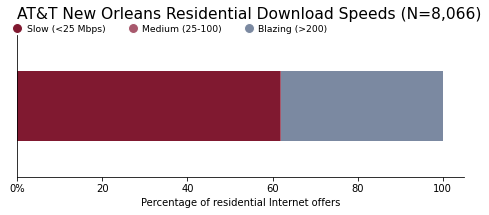

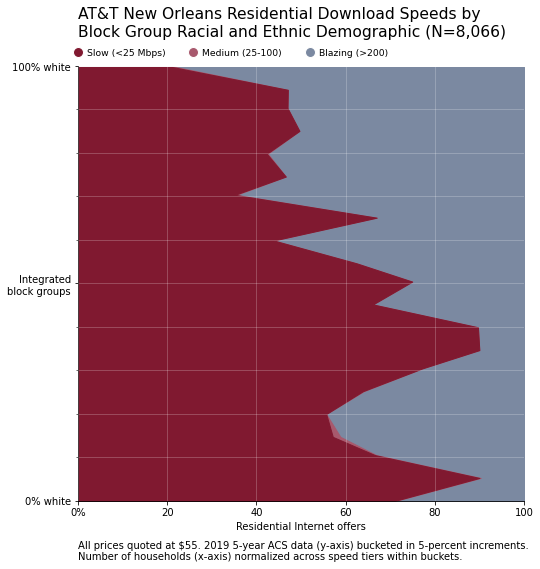

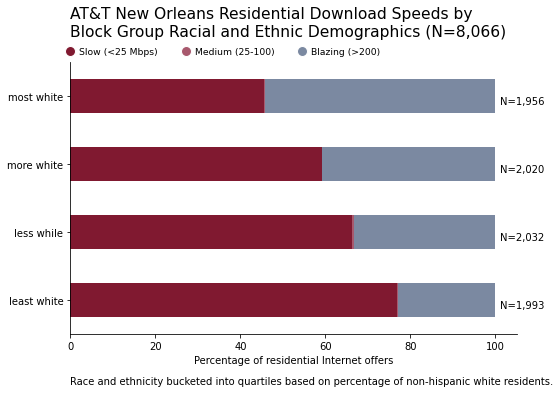

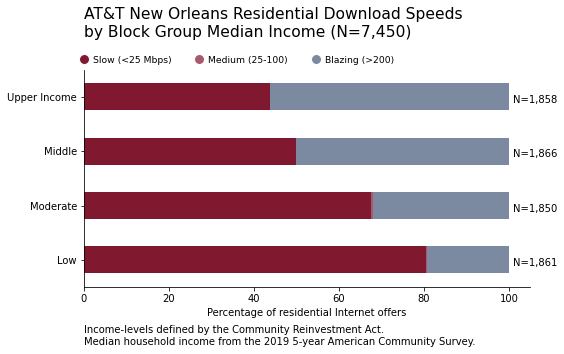

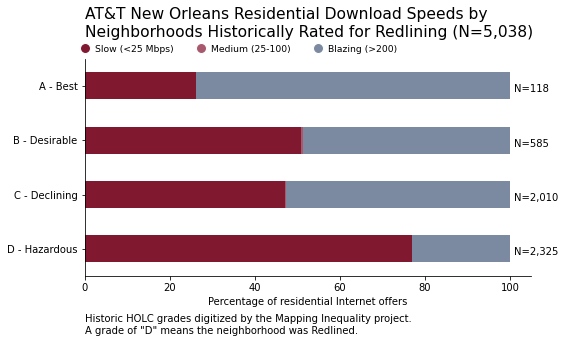

*******************************************************************************
oklahoma city


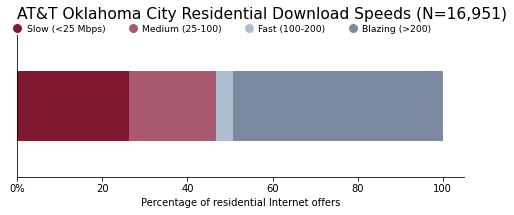

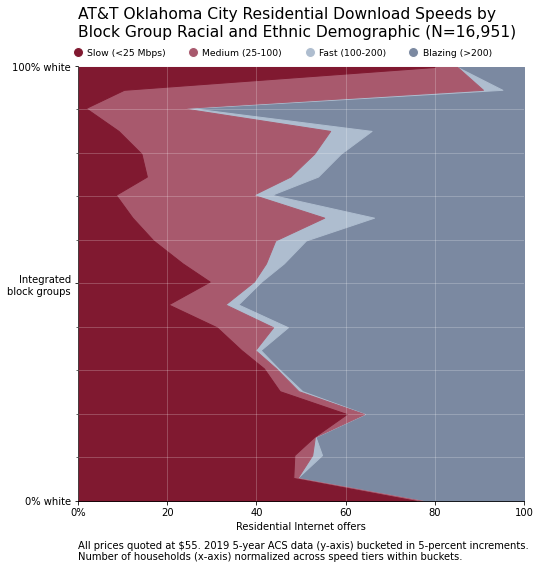

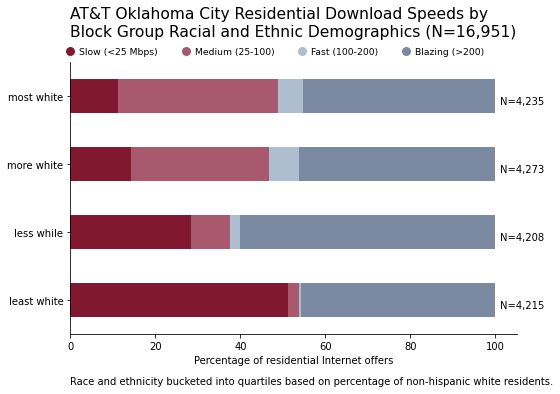

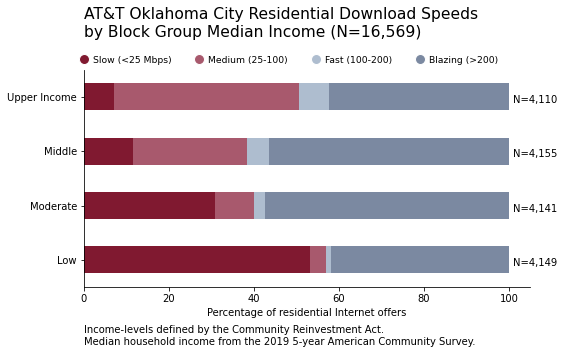

*******************************************************************************
wichita


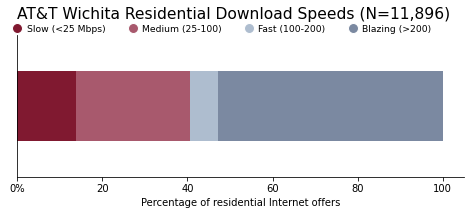

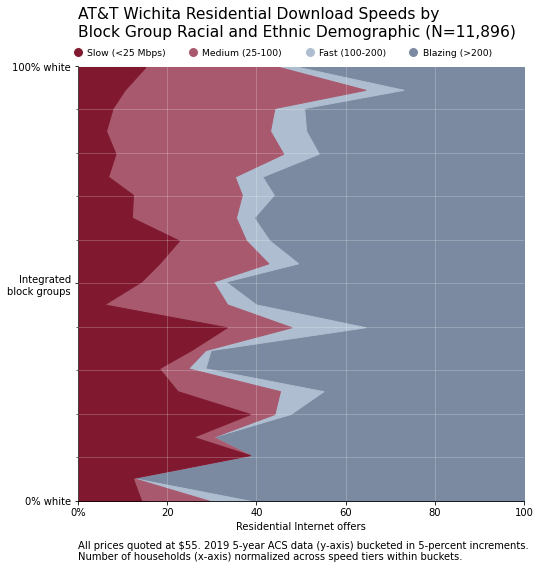

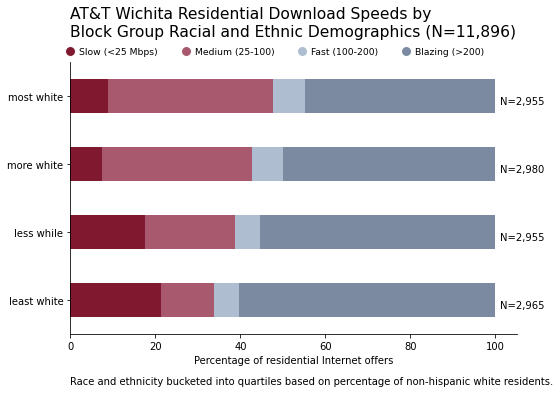

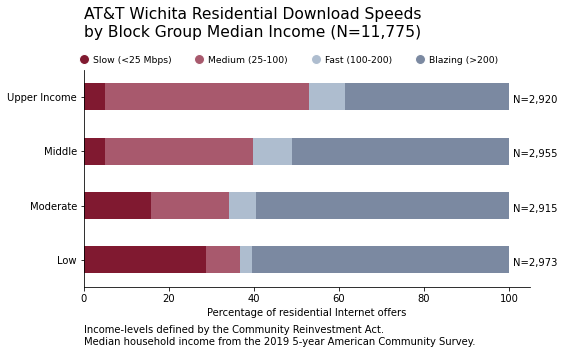

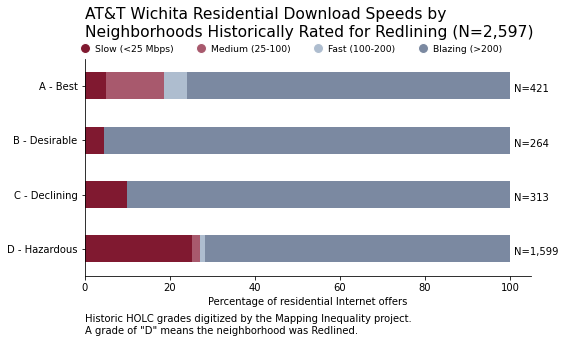

*******************************************************************************


In [19]:
for city, _df in att.groupby('major_city'):
    print(city)
    _df = bucket_and_bin(_df)
    speed_breakdown(_df, location=city.title())
    plot_race(_df, location=city.title())
    race(_df, location=city.title())
    income(_df, location=city.title())
    redlining(_df, location=city.title())
    fn_out = f'../data/intermediary/maps/att/{city}_offers.csv'
    if not os.path.exists(fn_out):
        os.makedirs(os.path.dirname(fn_out), exist_ok=True)
        _df.to_csv(fn_out, index=False)
    print("*" * 79)

## One city's graphs as an example

In [20]:
from pandas.api.types import CategoricalDtype
from config import income_labels

In [21]:
# outputs
fn_fig3a = '../data/output/figs/fig3_income.csv'
fn_fig3b = '../data/output/figs/fig3_race.csv'
fn_fig3c = '../data/output/figs/fig3_redline.csv'

In [22]:
df_city = bucket_and_bin(att[att.major_city == 'kansas city'])

In [23]:
df_city.loc[:, 'income_level'] = df_city['income_level'].astype(
     CategoricalDtype(income_labels, ordered=True)
).copy(deep=True)

to_plot = (df_city.groupby('income_level').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3a)

In [24]:
to_plot = (df_city.groupby('race_quantile').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3b)

In [25]:
to_plot = (df_city.groupby('redlining_grade').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3c)

In [28]:
# outputs
fn_fig_story_a = '../data/output/figs/story_fig1_income.csv'
fn_fig_story_b = '../data/output/figs/story_fig1_race.csv'
fn_fig_story_c = '../data/output/figs/story_fig1_redline.csv'

In [30]:
city = 'new orleans'
df_city = bucket_and_bin(att[att.major_city == city])
df_city.loc[:, 'income_level'] = df_city['income_level'].astype(
     CategoricalDtype(income_labels, ordered=True)
).copy(deep=True)

to_plot = (df_city.groupby('income_level').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot['major_city'] = city
to_plot.to_csv(fn_fig_story_a)
to_plot = (df_city.groupby('race_quantile').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot['major_city'] = city
to_plot.to_csv(fn_fig_story_b)
to_plot = (df_city.groupby('redlining_grade').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot['major_city'] = city
to_plot.to_csv(fn_fig_story_c)